In [1]:
import pandas as pd
import numpy as np
from sklearn.externals import joblib
from utils.classifications_utils import *
from utils.data_processing_utils import *
from utils.data_visualization_utils import *
from utils.metrics_utils import *
from utils.grid_search_utils import *
from sklearn.model_selection import train_test_split
from sklearn.ensemble import ExtraTreesClassifier, RandomForestClassifier, AdaBoostClassifier
from sklearn.preprocessing import MinMaxScaler
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings("ignore")
%matplotlib inline

In [2]:
#specify Project and drone data
project = "Project 2"
drone_in_use = "drone1"

In [3]:
level_0_wind = load_data(0, 6, project, drone_in_use)
level_0_wind = separate_data_based_on_apparatus(level_0_wind)

level_1_wind = load_data(1, 6, project, drone_in_use)
level_1_wind = separate_data_based_on_apparatus(level_1_wind)

level_2_wind = load_data(2, 6, project, drone_in_use)
level_2_wind = separate_data_based_on_apparatus(level_2_wind)

level_3_wind = load_data(3, 6, project, drone_in_use)
level_3_wind = separate_data_based_on_apparatus(level_3_wind)

display(level_0_wind.keys())

dict_keys(['acc', 'gyro', 'mag', 'stabilizer'])

In [4]:
acc_no_wind, gyro_no_wind, _, _ = level_0_wind.values()
label_0 = [0 for x in range(acc_no_wind.shape[0])]

acc_level_1_wind, gyro_level_1_wind, _, _ = level_1_wind.values()
label_1 = [1 for x in range(acc_level_1_wind.shape[0])]

acc_level_2_wind, gyro_level_2_wind, _, _ = level_2_wind.values()
label_2 = [2 for x in range(acc_level_2_wind.shape[0])]

acc_level_3_wind, gyro_level_3_wind, _, _ = level_3_wind.values()
label_3 = [3 for x in range(acc_level_3_wind.shape[0])]

# Visualize data in frequency domains: level 0

In [5]:
from scipy import signal
from utils.reduce_noise_utils import *

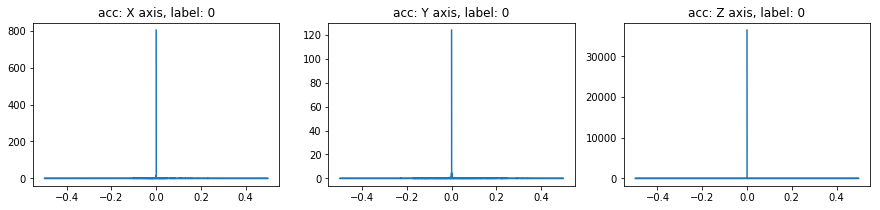

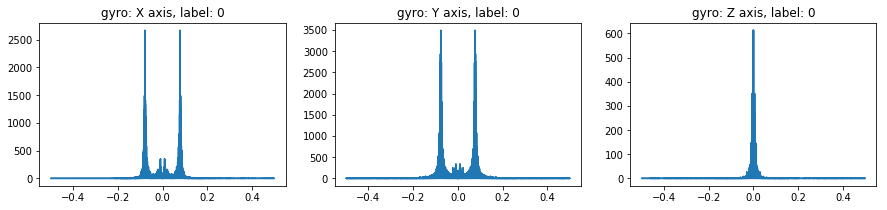

In [6]:
plot_in_frequency_domain(acc_no_wind, 0, 'acc')
plot_in_frequency_domain(gyro_no_wind, 0, 'gyro')

# Visualize data in frequency domain: level 1

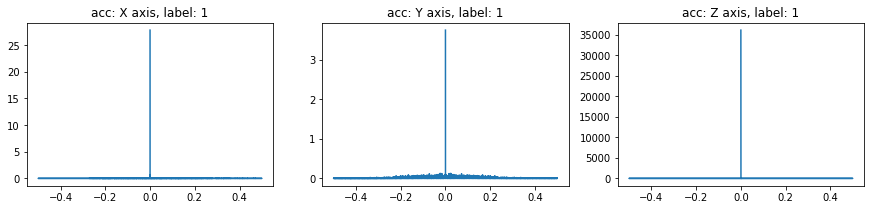

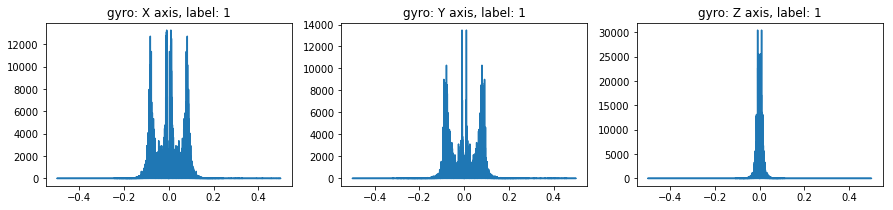

In [7]:
plot_in_frequency_domain(acc_level_1_wind, 1, 'acc')
plot_in_frequency_domain(gyro_level_1_wind, 1, 'gyro')

# Visualize data in frequency domain: level 2

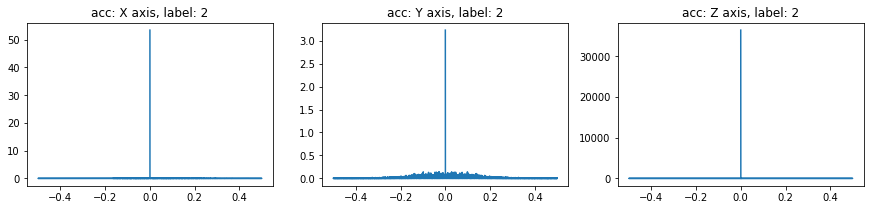

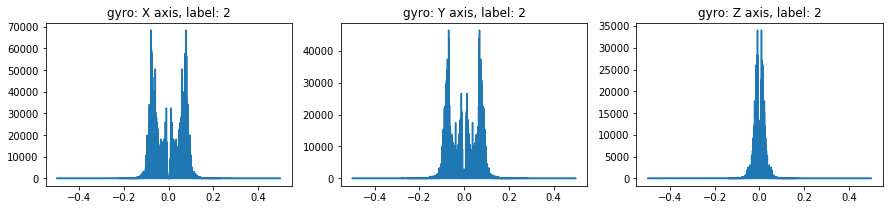

In [8]:
plot_in_frequency_domain(acc_level_2_wind, 2, 'acc')
plot_in_frequency_domain(gyro_level_2_wind, 2, 'gyro')

# Visualize data in frequency domain: level 3

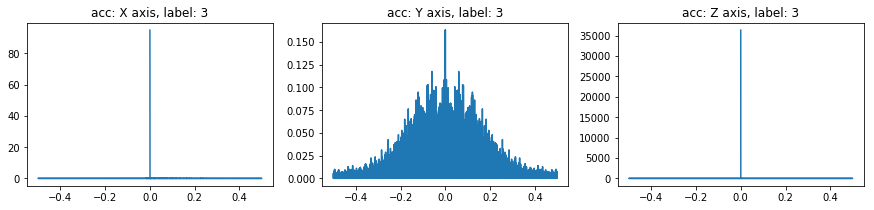

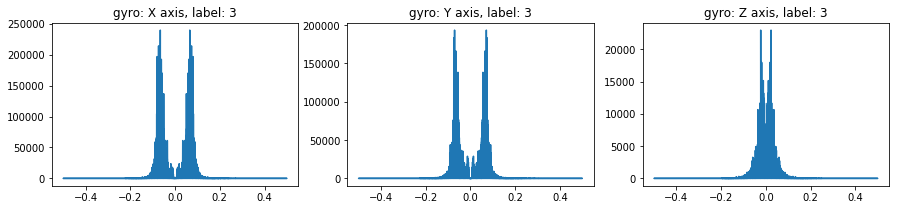

In [9]:
plot_in_frequency_domain(acc_level_3_wind, 3, 'acc')
plot_in_frequency_domain(gyro_level_3_wind, 3, 'gyro')

# Reduce noise

In [10]:
gyro_no_wind_reduced = reduce_noise_with_FFT(gyro_no_wind, [100, 300, 200])

In [11]:
gyro_level_1_reduced = reduce_noise_with_FFT(gyro_level_1_wind, [2500, 5000, 2000])

In [12]:
gyro_level_2_reduced = reduce_noise_with_FFT(gyro_level_2_wind, [6000, 2000, 1000])

In [13]:
gyro_level_3_reduced = reduce_noise_with_FFT(gyro_level_3_wind, [9000, 5000, 2000])

# Split No Wind Data

In [14]:
X_train_acc_0, X_test_acc_0, y_train_acc_0, y_test_acc_0 = \
train_test_split(acc_no_wind, label_0, test_size=0.2, shuffle=False)

X_train_gyro_0, X_test_gyro_0, y_train_gyro_0, y_test_gyro_0 = \
train_test_split(gyro_no_wind, label_0, test_size=0.2, shuffle=False)

# Split Level 1 Wind

In [15]:
X_train_acc_1, X_test_acc_1, y_train_acc_1, y_test_acc_1 = \
train_test_split(acc_level_1_wind, label_1, test_size=0.2, shuffle=False)

X_train_gyro_1, X_test_gyro_1, y_train_gyro_1, y_test_gyro_1 = \
train_test_split(gyro_level_1_wind, label_1, test_size=0.2, shuffle=False)

# Split Level 2 Wind

In [16]:
X_train_acc_2, X_test_acc_2, y_train_acc_2, y_test_acc_2 = \
train_test_split(acc_level_2_wind, label_2, test_size=0.2, shuffle=False)

X_train_gyro_2, X_test_gyro_2, y_train_gyro_2, y_test_gyro_2 = \
train_test_split(gyro_level_2_wind, label_2, test_size=0.2, shuffle=False)

# Split Level 3 Wind

In [17]:
X_train_acc_3, X_test_acc_3, y_train_acc_3, y_test_acc_3 = \
train_test_split(acc_level_3_wind, label_3, test_size=0.2, shuffle=False)

X_train_gyro_3, X_test_gyro_3, y_train_gyro_3, y_test_gyro_3 = \
train_test_split(gyro_level_3_wind, label_3, test_size=0.2, shuffle=False)

# Stack data up

# Gyro

In [18]:
X_train_gyro = X_train_gyro_0.append(X_train_gyro_1)
X_train_gyro = X_train_gyro.append(X_train_gyro_2)
X_train_gyro = X_train_gyro.append(X_train_gyro_3)
y_train_gyro = np.hstack((y_train_gyro_0, y_train_gyro_1, y_train_gyro_2, y_train_gyro_3))

In [19]:
X_test_gyro = X_test_gyro_0.append(X_test_gyro_1)
X_test_gyro = X_test_gyro.append(X_test_gyro_2)
X_test_gyro = X_test_gyro.append(X_test_gyro_3)
y_test_gyro = np.hstack((y_test_gyro_0, y_test_gyro_1, y_test_gyro_2, y_test_gyro_3))

# Accelerometer

In [20]:
X_train_acc = X_train_acc_0.append(X_train_acc_1)
X_train_acc = X_train_acc.append(X_train_acc_2)
X_train_acc = X_train_acc.append(X_train_acc_3)
y_train_acc = np.hstack((y_train_acc_0, y_train_acc_1, y_train_acc_2, y_train_acc_3))

In [21]:
X_test_acc = X_test_acc_0.append(X_test_acc_1)
X_test_acc = X_test_acc.append(X_test_acc_2)
X_test_acc = X_test_acc.append(X_test_acc_3)
y_test_acc = np.hstack((y_test_acc_0, y_test_acc_1, y_test_acc_2, y_test_acc_3))

# Transform and generate features

# Gyro

In [22]:
from transformers.featureGenerator import FeatureGenerator

In [23]:
feature_generator_gyro2 = FeatureGenerator(1)
feature_generator_gyro2.fit(X_train_gyro, 4)

FeatureGenerator(sliding_window=1)

In [24]:
X_train_gyro = feature_generator_gyro2.transform(X_train_gyro, 'gyro')
y_train_gyro = reduce_label_amount(y_train_gyro, 4)

28701


In [25]:
feature_generator_gyro_test2 = FeatureGenerator(1)
feature_generator_gyro_test2.fit(X_test_gyro, 4)

FeatureGenerator(sliding_window=1)

In [26]:
X_test_gyro = feature_generator_gyro_test2.transform(X_test_gyro, 'gyro')
y_test_gyro = reduce_label_amount(y_test_gyro, 4)

7101


# Train a random forest classifier and predict

In [27]:
from sklearn.ensemble import RandomForestClassifier
import pickle

In [28]:
clf_gyro2 = RandomForestClassifier(n_estimators=150)
clf_gyro2.fit(X_train_gyro, y_train_gyro)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=150, n_jobs=1,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False)

In [29]:
pickle.dump(clf_gyro2, open("pickled_models/randomforest_gyro_" + drone_in_use + ".sav", 'wb'))

In [30]:
y_pred_gyro = clf_gyro2.predict(X_test_gyro)

# Confusion Matrix: Gyro

In [31]:
get_confusion_matrix(y_test_gyro, y_pred_gyro)

,actual_0,actual_1,actual_2,actual_3
predicted_0,7093,8,0,0
predicted_1,23,7071,7,0
predicted_2,0,0,6975,126
predicted_3,0,0,557,6544


# Accuracy: Gyro

In [32]:
clf_gyro2.score(X_test_gyro, y_test_gyro)

0.9746162512322208

# Accelerometer

# Generate features

In [33]:
feature_generator_acc2 = FeatureGenerator(1)
feature_generator_acc2.fit(X_train_acc, 4)

FeatureGenerator(sliding_window=1)

In [34]:
X_train_acc = feature_generator_acc2.transform(X_train_acc, 'acc')
y_train_acc = reduce_label_amount(y_train_acc, 4)

28701


In [35]:
feature_generator_acc_test2 = FeatureGenerator(1)
feature_generator_acc_test2.fit(X_test_acc, 4)

FeatureGenerator(sliding_window=1)

In [36]:
X_test_acc = feature_generator_acc_test2.transform(X_test_acc, 'acc')
y_test_acc = reduce_label_amount(y_test_acc, 4)

7101


# Train a classifier

In [37]:
clf_acc2 = RandomForestClassifier(n_estimators=150)
clf_acc2.fit(X_train_acc, y_train_acc)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=150, n_jobs=1,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False)

In [38]:
y_pred_acc = clf_acc2.predict(X_test_acc)

# Confusion Matrix: ACC

In [39]:
get_confusion_matrix(y_test_acc, y_pred_acc)

,actual_0,actual_1,actual_2,actual_3
predicted_0,6606,399,39,57
predicted_1,217,5419,1270,195
predicted_2,0,2463,4141,497
predicted_3,0,367,2533,4201


# Accuracy: ACC

In [40]:
clf_acc2.score(X_test_acc, y_test_acc)

0.7170468948035488

# Use both acc and gyro data

In [41]:
X_train_all = pd.concat([X_train_acc, X_train_gyro], axis=1)
y_train_all = y_train_acc

In [42]:
X_test_all = pd.concat([X_test_acc, X_test_gyro], axis=1)
y_test_all = y_test_acc

In [43]:
clf_all = RandomForestClassifier(n_estimators=150)
clf_all.fit(X_train_all, y_train_all)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=150, n_jobs=1,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False)

In [44]:
y_pred_all = clf_all.predict(X_test_all)

# Confusion Matrix: Combined

In [45]:
get_confusion_matrix(y_test_all, y_pred_all)

,actual_0,actual_1,actual_2,actual_3
predicted_0,7101,0,0,0
predicted_1,0,7081,18,2
predicted_2,0,0,6985,116
predicted_3,0,0,624,6477


# Accuracy: Combined

In [46]:
clf_all.score(X_test_all, y_test_all)

0.9732432051823687